In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import scipy.interpolate as interp
import pandas as pd
from helpers import *
# ensure the notebook generate the same randomess
np.random.seed(1)


In [38]:
N = 5
R = [10, 10**3,10**5, 10**7]

In [39]:
PoA = []
for r in R: 
    v = np.random.uniform(0,1,(r,N))
    b =  bet_random(v)

    auctioneer_reve = [sum(bi) for bi in b]
    winner_index=np.argmax(b, axis=1)
    winner_reve = v[np.arange(r), winner_index] - b[np.arange(r), winner_index]
    Welf = auctioneer_reve + winner_reve
    Opt =v.max(axis = 1)
    PoA.append(np.mean(Welf/Opt))

pd.DataFrame({"R":R, 'PoA':PoA})

,R,PoA
0,10,1.813728
1,1000,1.744478
2,100000,1.737010
3,10000000,1.737789


In [40]:
n = 100
r = 1000

In [42]:
PoA_mean = []
PoA_min = []
PoA_max = []

for N in range(1,n): 
    v = np.random.uniform(0,1,(r, N))
    b =  bet_random(v)
    auctioneer_reve = [sum(bi) for bi in b]

    winner_index=np.argmax(b, axis=1)
    winner_reve = v[np.arange(r), winner_index] - b[np.arange(r), winner_index]

    Welf = auctioneer_reve + winner_reve

    Opt =v.max(axis = 1)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))
    PoA_max.append(max(PoA))

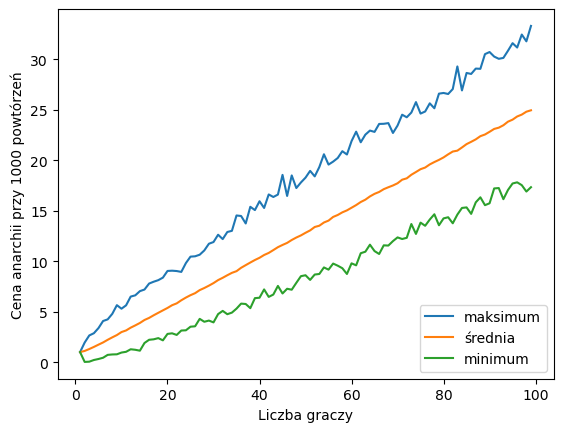

In [44]:
fig, ax = plt.subplots()
x = list(range(1,n))
ax.plot(x,PoA_max, label = 'maksimum')
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("Cena anarchii przy 1000 powtórzeń")
ax.legend(loc='lower right')
#plt.ylim(0, 1.05)
plt.savefig('normal.png')